In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import neighbors, model_selection, tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
dataset = pd.read_csv('all_stocks_5yr.csv', delimiter=',')
#se eliminan las filas que tienen valores nulos de cara a realizar posteriores estudios
#HABRIA QUE TENERLO IMPUTADO CON VALORES PERDIDOS!!
dataset.dropna(axis=0, inplace = True) 

In [4]:
atSalida = 'close'
atEntrada = ['open','high','low','volume']

dataset_output = dataset[atSalida].copy()
dataset.drop(atSalida, axis=1, inplace=True)
dataset = dataset[atEntrada].copy()

Por tanto , las columnas nulas son open, high y  low

# 3.3 Transformación de variables categóricas a numéricas

No se va a realizar dicho tipo de transformación , pues para el proyecto se realizará principalmente redes neuronales y regresión polinomial.

# 3.4 Reducción de datos

AGREGAR DESPUES VARIABLE FECHA!!!!!

# Obtención del rendimiento con todas las variables

Para comprobar la calidad de las técnicas de selección de variables, se va a calcular el rendimiento de una regresión polinomial  si utilizamos todas las variables. Nos hemos decidido por esta técnica, pues es fácil de implementar.

Se aplicará el método hold-out para obtener los conjuntos de entrenamiento y de test (70% de datos para entrenar).



SE ELIMINARAN LAS FILAS ASOCIADAS A LOS VALORES NULOS PARA PODER REALIZAR LAS COSAS!!! JUNTAR CON LO DE IVAN!

Rendimiento con regresión polinomial sobre todas las variables

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset_output, test_size=0.2, random_state=12)

In [9]:
def regresion_polinomial():
    # Generamos los conjuntos de entrenamiento y de test
    X_train, X_test, y_train, y_test = train_test_split(dataset, dataset_output, test_size=0.2, random_state=12)
    # Creamos una Pipeline en la que generamos variables polinómicas de grado 2, estandarizamos los datos y aprendemos una regresión lineal
    pipePolinomial = Pipeline([('polynomial', PolynomialFeatures(degree=2)),('scaler', StandardScaler()),('regressor', LinearRegression())])
    # Entrenamos la Pipeline
    pipePolinomial.fit(X_train, y_train)
    # Obtenemos el rendimiento en entrenamiento y en test (MSE)
    prTrain = pipePolinomial.predict(X_train)
    errorTrain = mean_squared_error(y_train, prTrain)
    prTest = pipePolinomial.predict(X_test)
    errorTest = mean_squared_error(y_test, prTest)
    print('El error en entrenamiento es {:.4f} y en test es {:.4f}'.format(errorTrain, errorTest))
regresion_polinomial()

El error en entrenamiento es 0.4663 y en test es 0.4903


## Análisis de correlaciones

In [10]:
import matplotlib.pyplot as plt
correlaciones = X_train.corr(method ='pearson')
correlaciones

,open,high,low,volume
open,1.000000,0.999938,0.999927,-0.143243
high,0.999938,1.000000,0.999902,-0.142844
low,0.999927,0.999902,1.000000,-0.143780
volume,-0.143243,-0.142844,-0.143780,1.000000


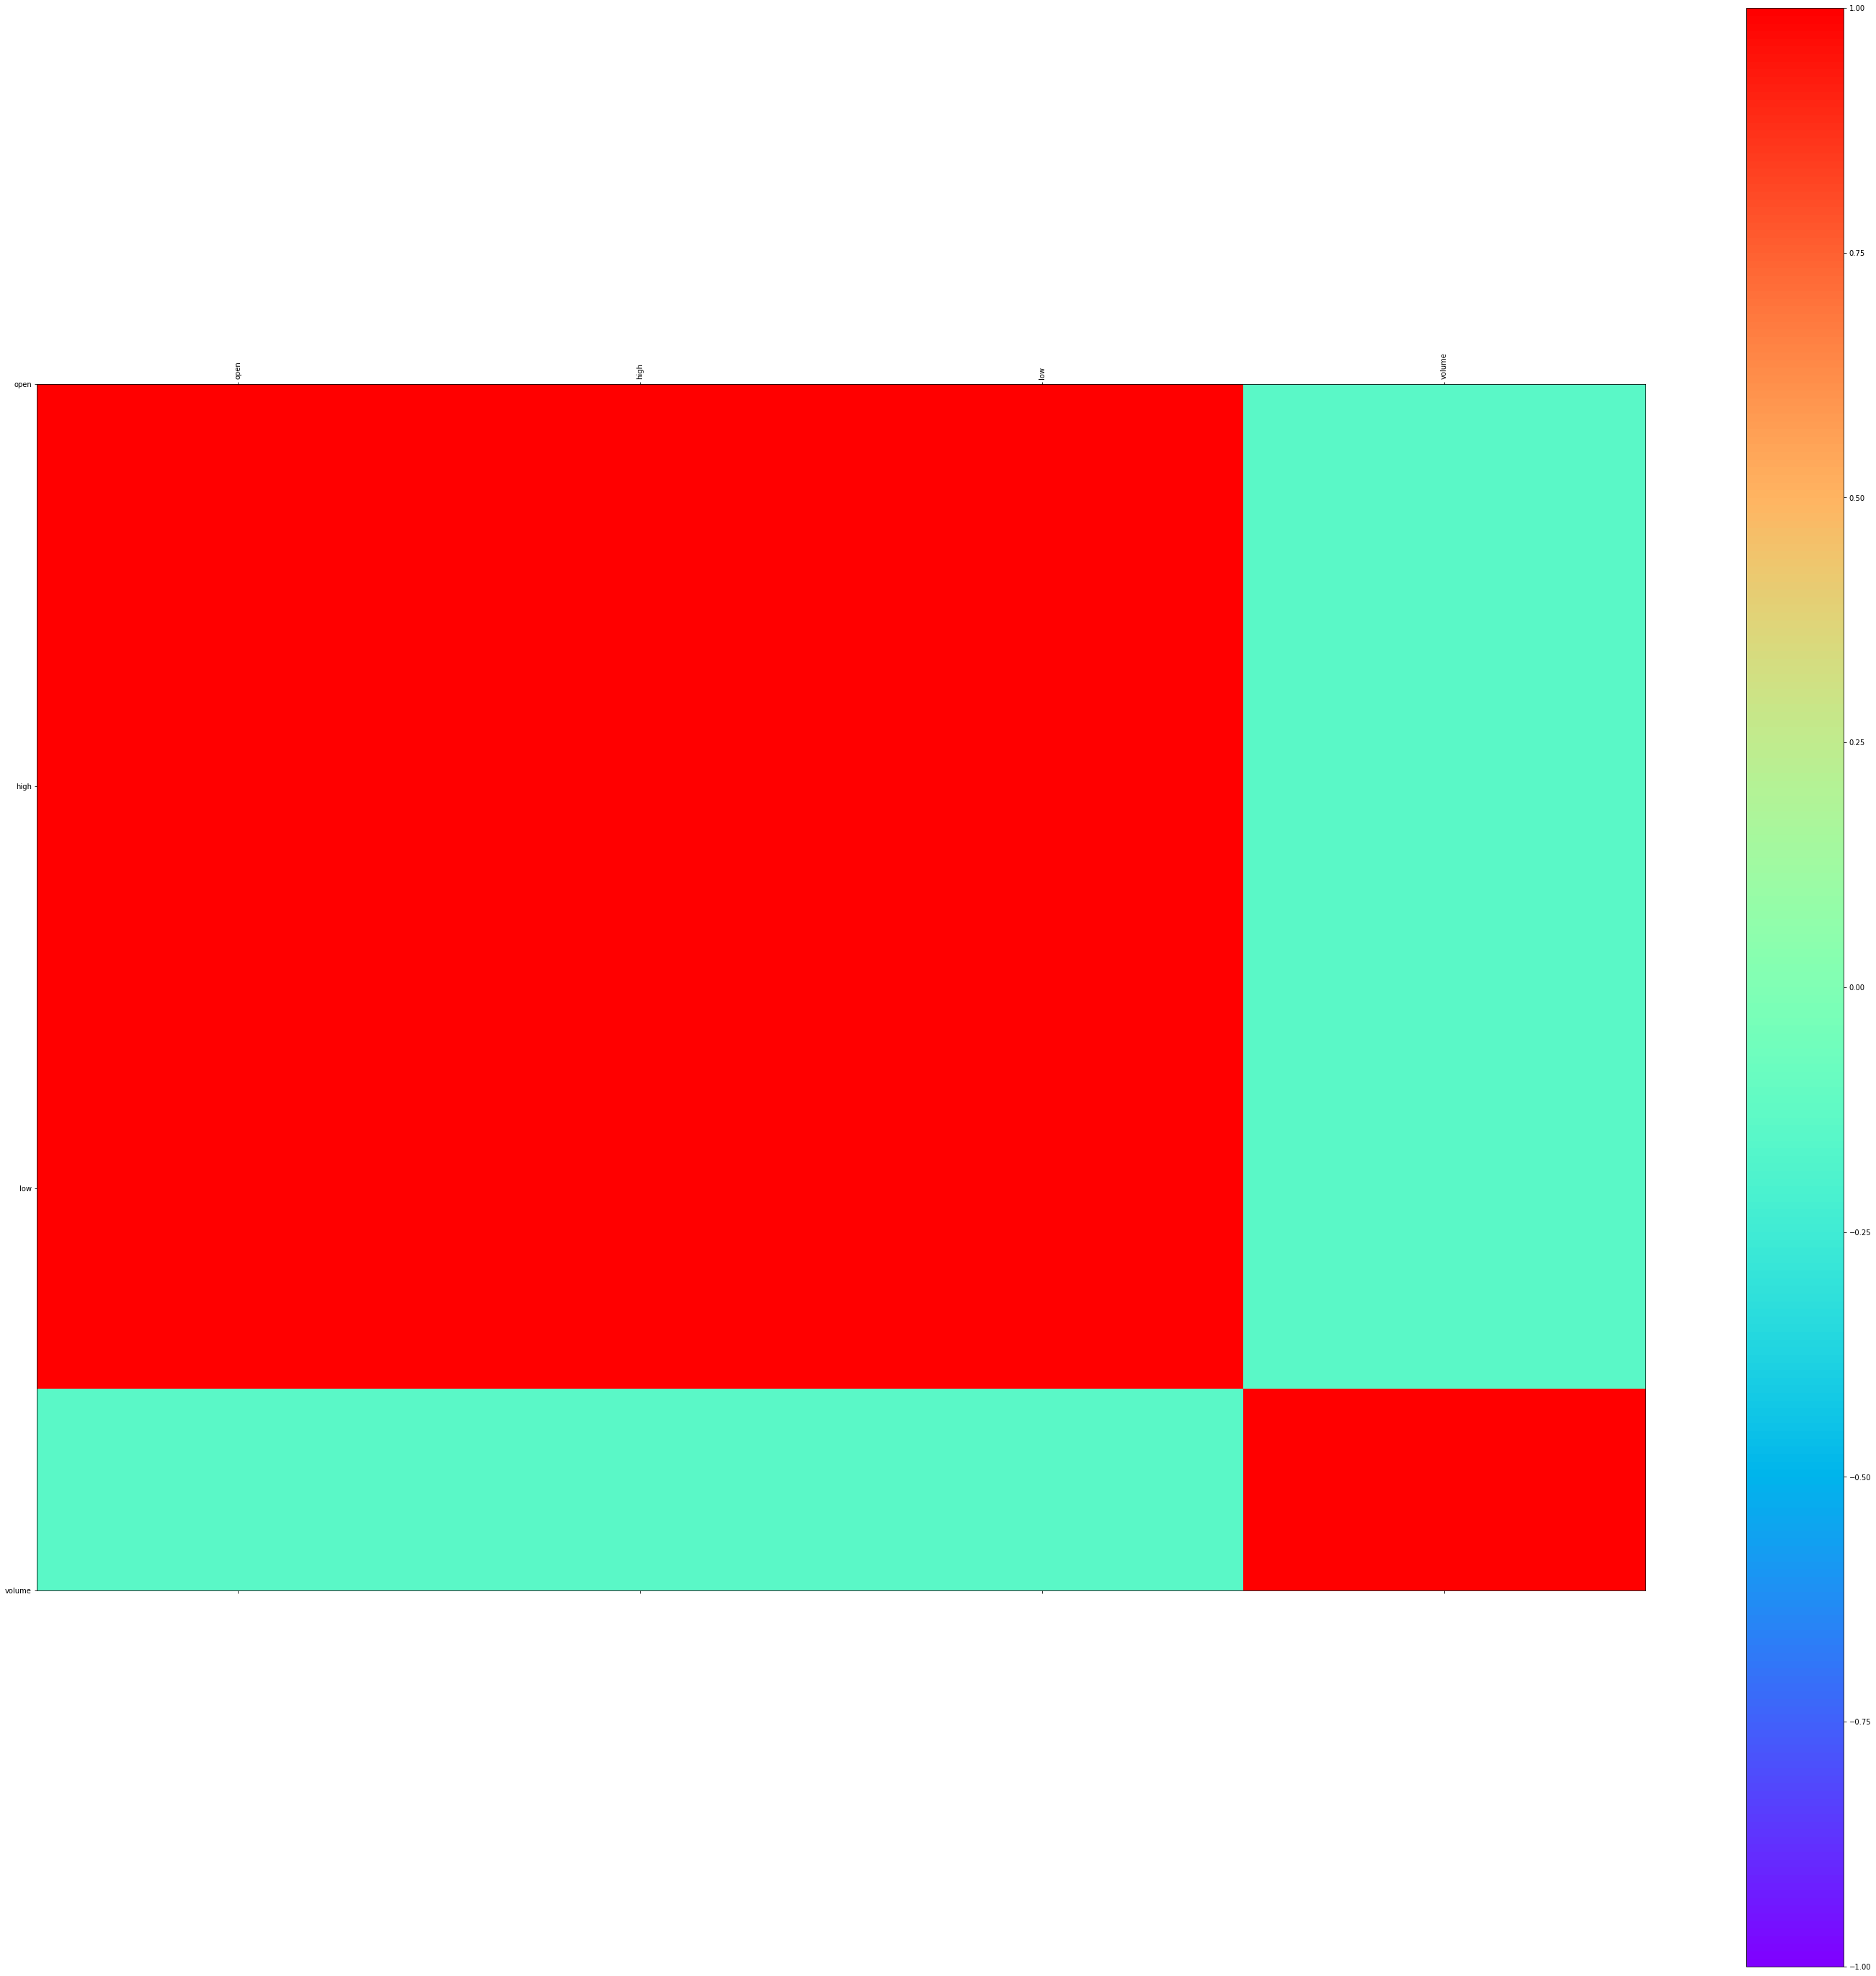

In [11]:
# Mostramos la matriz de correlaciones especificando el rango de los valores [-1, 1]
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111)
cax = ax.matshow(correlaciones, vmin=-1, vmax=1, cmap=plt.cm.rainbow)
fig.colorbar(cax)
ticks = np.arange(0,len(X_train.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# Añadimos los nombres de las variables en la figura
names = X_train.columns
ax.set_xticklabels(names, rotation='90')
ax.set_yticklabels(names)
plt.show()

Tras la obtención de matriz de correlaciones, se puede determinar que las variables de entrada están relacionadas entre si de manera muy alta, salvo el volumen.

Veamos ahora el rendimiento que se obtendría al eliminar una de éstas variables. Para hacer más completo el experimento, se procederá a crear 3 datasets distintos: cada uno eliminando una variable distinta.

*Eliminación* *de* *open*, *high*, *low* por separado

In [12]:
dataset1 = dataset.copy()
dataset_output1 = dataset_output.copy()

In [13]:
variables = ['open', 'high', 'low']   
for nombrevar in variables:
    X_train, X_test, y_train, y_test = train_test_split(dataset1, dataset_output1, test_size=0.2, random_state=12)
    X_train = X_train.drop([nombrevar],axis=1)
    X_test = X_test.drop([nombrevar],axis=1)

    pipePolinomial = Pipeline([('polynomial', PolynomialFeatures(degree=2)),('scaler', StandardScaler()),('regressor', LinearRegression())])
    pipePolinomial.fit(X_train, y_train)

    #Se obtiene el rendimiento en entrenamiento y en test (MSE)
    prTrain = pipePolinomial.predict(X_train)
    errorTrain = mean_squared_error(y_train, prTrain)
    prTest = pipePolinomial.predict(X_test)
    errorTest = mean_squared_error(y_test, prTest)
    print(f"Resutados para la eliminacion de {nombrevar}")
    print('El error en entrenamiento es {:.4f} y en test es {:.4f}'.format(errorTrain, errorTest))
    print()

Resutados para la eliminacion de open
El error en entrenamiento es 0.7150 y en test es 0.7317

Resutados para la eliminacion de high
El error en entrenamiento es 1.1110 y en test es 1.1582

Resutados para la eliminacion de low
El error en entrenamiento es 1.1819 y en test es 1.1106



*Eliminación* *por* *pares*

In [14]:
pares = [ ['open', 'high'] , ['open', 'low'] , ['high', 'low']]   
for par in pares:
    X_train, X_test, y_train, y_test = train_test_split(dataset1, dataset_output1, test_size=0.2, random_state=12)
    
    X_train = X_train.drop([par[0]],axis=1)
    X_train = X_train.drop([par[1]],axis=1)

    X_test = X_test.drop([par[0]],axis=1)
    X_test = X_test.drop([par[1]],axis=1)


    pipePolinomial = Pipeline([('polynomial', PolynomialFeatures(degree=2)),('scaler', StandardScaler()),('regressor', LinearRegression())])
    pipePolinomial.fit(X_train, y_train)

    #Se obtiene el rendimiento en entrenamiento y en test (MSE)
    prTrain = pipePolinomial.predict(X_train)
    errorTrain = mean_squared_error(y_train, prTrain)
    prTest = pipePolinomial.predict(X_test)
    errorTest = mean_squared_error(y_test, prTest)
    print(f"Resutados para la eliminacion de {par[0]} y {par[1]}")
    print('El error en entrenamiento es {:.4f} y en test es {:.4f}'.format(errorTrain, errorTest))
    print()

Resutados para la eliminacion de open y high
El error en entrenamiento es 1.1283 y en test es 1.1791

Resutados para la eliminacion de open y low
El error en entrenamiento es 1.1996 y en test es 1.1292

Resutados para la eliminacion de high y low
El error en entrenamiento es 2.4314 y en test es 2.4117



*Eliminación* *de* *las* *tres* *variables*

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset1, dataset_output1, test_size=0.2, random_state=12)
    
X_train = X_train.drop(['open'] ,axis=1)
X_train = X_train.drop(['low'],axis=1)
X_train = X_train.drop(['high'] ,axis=1)

X_test = X_test.drop(['open'] ,axis=1)
X_test = X_test.drop(['low'],axis=1)
X_test = X_test.drop(['high'] ,axis=1)

pipePolinomial = Pipeline([('polynomial', PolynomialFeatures(degree=2)),('scaler', StandardScaler()),('regressor', LinearRegression())])
pipePolinomial.fit(X_train, y_train)

#Se obtiene el rendimiento en entrenamiento y en test (MSE)
prTrain = pipePolinomial.predict(X_train)
errorTrain = mean_squared_error(y_train, prTrain)
prTest = pipePolinomial.predict(X_test)
errorTest = mean_squared_error(y_test, prTest)
print("Resultado para la eliminacion de high, low, y open")
print('El error en entrenamiento es {:.4f} y en test es {:.4f}'.format(errorTrain, errorTest))
print()

Resultado para la eliminacion de high, low, y open
El error en entrenamiento es 9129.4072 y en test es 9497.4260



Tras los experimentos realizados, se puede observar que se obtiene un peor resultado al tratar de eliminar cualquiera de las tres variables que cuentan con una mayor correlación -casi perfecta- .

Por otro lado, en caso de eliminar una variable,la que menos impacto tiene en el rendimiento del modelo es 'open', y la que más influye es 'high'. 

En caso de eliminar dos variables,el mayor impacto negativo en el rendimiento vendrá dado por la eliminación de conjunta de 'low' y 'high'. Cosa que es natural, pues representa el valor más bajo y más alto de las acciones de una empresa en un día.

La eliminación de 'high', 'low' y 'open' provoca un desenlace nefasto y esperado, pues predecir el valor al final del día de las acciones a partir del volumen de acciones negociadas es sumamente complicado 

# Comparativas de métodos

# Uso de regresión polinomial

In [13]:
regresion_polinomial()

El error en entrenamiento es 0.4663 y en test es 0.4903


# LSTM

In [33]:
pip install keras
pip install tensorflow

SyntaxError: invalid syntax (<ipython-input-33-d2a01015921f>, line 1)

In [16]:
#importing the packages 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [29]:
#Lectura de datos
todataframe = pd.read_csv('all_stocks_5yr.csv', delimiter=',')
todataframe.dropna(axis=0, inplace = True) 

La comparativa del método se hará con la empresa AAl

In [30]:
todataframe = todataframe[todataframe['Name']=='AAL']

In [31]:
#Creacion del dataframe
seriesdata = todataframe.sort_index(ascending=True, axis=0)
new_seriesdata = pd.DataFrame(index=range(0,len(todataframe)),columns=['date','close'])
length_of_data=len(seriesdata)
for i in range(0,length_of_data):
    new_seriesdata['date'][i] = seriesdata['date'][i]
    new_seriesdata['close'][i] = seriesdata['close'][i]
    
#Colocar los indices de nuevo
new_seriesdata.index = new_seriesdata.date
new_seriesdata.drop('date', axis=1, inplace=True)
#Crear un conjunto de entrenamiento y de test (70% para train, 30% para test)
numero_ejemplos_entrenamiento = int(len(new_seriesdata)*0.7)

#Crear conjuntos de train y test con el total de los elementos
myseriesdataset = new_seriesdata.values
totrain = myseriesdataset[0:numero_ejemplos_entrenamiento,:] #conjunto de ejemplos para entrenar
tovalid = myseriesdataset[numero_ejemplos_entrenamiento:,:] #conjunto de ejemplos para validar

#Convertir el dataset en x_train e y_train
scalerdata = MinMaxScaler(feature_range=(0, 1))
scale_data = scalerdata.fit_transform(myseriesdataset)
x_totrain, y_totrain = [], []
length_of_totrain=len(totrain)
for i in range(60,length_of_totrain):
    x_totrain.append(scale_data[i-60:i,0])
    y_totrain.append(scale_data[i,0])
x_totrain, y_totrain = np.array(x_totrain), np.array(y_totrain)
x_totrain = np.reshape(x_totrain, (x_totrain.shape[0],x_totrain.shape[1],1))

#LSTM neural network configuracion
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_totrain.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adadelta', metrics= ['mean_squared_error'])
lstm_model.fit(x_totrain, y_totrain, epochs=3, batch_size=1, verbose=2)

,date,close
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99
...,...,...
1254,2018-02-01,53.88
1255,2018-02-02,52.1
1256,2018-02-05,49.76
1257,2018-02-06,51.18


In [41]:
#Predecir
myinputs = new_seriesdata[len(new_seriesdata) - (len(tovalid)+1) - 60:].values
myinputs = myinputs.reshape(-1,1)
myinputs  = scalerdata.transform(myinputs)
tostore_test_result = []
for i in range(60,myinputs.shape[0]):
    tostore_test_result.append(myinputs[i-60:i,0])
tostore_test_result = np.array(tostore_test_result)
tostore_test_result = np.reshape(tostore_test_result,(tostore_test_result.shape[0],tostore_test_result.shape[1],1))
myclosing_priceresult = lstm_model.predict(tostore_test_result)
myclosing_priceresult


In [51]:
myclosing_priceresult = scalerdata.inverse_transform(myclosing_priceresult)